In [89]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

import koreanize_matplotlib
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import auc, roc_curve, roc_auc_score , accuracy_score, mean_squared_error, f1_score

from scipy.stats import stats 
from scipy.stats import chi2_contingency



In [69]:
df = pd.read_csv('C:/Users/82108/Notebook/EP_1_data/m1.csv')
df.head() 

ÏÑ±Î≥Ñ  Ïó∞Î†π  Î≥ëÏõê ÎèÑÏ∞© Ï†Ñ ÏûêÎ∞úÏàúÌôò ÌöåÎ≥µ Ïó¨Î∂Ä  Î≥ëÏõê ÎèÑÏ∞© Ï†Ñ Í∏âÏÑ±Ïã¨Ïû•Ï†ïÏßÄ Î™©Í≤© Ïó¨Î∂Ä  Î™©Í≤©ÏûêÏú†Ìòï1  Î™©Í≤©ÏûêÏú†Ìòï2  \
0   1   0                   2                     1     NaN     3.0   
1   1   0                   2                     1     NaN     3.0   
2   1   0                   2                     1     NaN     3.0   
3   1   0                   2                     1     NaN     3.0   
4   1   0                   2                     1     NaN     3.0   

   ÏùºÎ∞òÏù∏ Ïã¨ÌèêÏÜåÏÉùÏà† ÏãúÌñâÏó¨Î∂Ä  Î∞úÏÉùÏû•ÏÜå_Í≥µÍ≥µÏû•ÏÜå  Î∞úÏÉùÏû•ÏÜå_ÎπÑÍ≥µÍ≥µÏû•ÏÜå  Í∏âÏÑ±Ïã¨Ïû•Ï†ïÏßÄ Î∞úÏÉù ÎãπÏãú ÌôúÎèô  Î∞úÏÉùÏõêÏù∏_ÏßàÎ≥ë  Î∞úÏÉùÏõêÏù∏_ÏßàÎ≥ëÏô∏  \
0               2        NaN         1.0                7      1.0       NaN   
1               2        NaN         1.0                7      1.0       NaN   
2               2        NaN         1.0                7      5.0       NaN   
3               2        NaN         1.0                7      5.0       NaN   
4               2        NaN         1.0                7      5.0       NaN   

   ÏùëÍ∏âÏã§ Ïã¨ÌèêÏÜåÏÉùÏà† ÌõÑ ÏûêÎ∞úÏàúÌôò ÌöåÎ≥µ Ïó¨Î∂Ä  ÏùëÍ∏âÏã§ Ï†úÏÑ∏Îèô Ïã§Ïãú Ïó¨Î∂Ä ÌôòÏûê Î∞úÏÉùÏû•ÏÜå_ÏãúÎèÑ  
0                     1.0              1         ÏÑúÏö∏  
1                     2.0              1         Í≤ΩÍ∏∞  
2                     1.0              1         Í≤ΩÍ∏∞  
3                     1.0              1         Í≤ΩÍ∏∞  
4                     1.0              1         Í≤ΩÍ∏∞

In [70]:
index = pd.read_csv('C:/Users/82108/Notebook/EP_1_data/m1_index.csv')
index.head() 

Î≥ÄÏàò  Í∞í          ÏùòÎØ∏
0                    ÏÑ±Î≥Ñ  1          ÎÇ®Ïûê
1                    ÏÑ±Î≥Ñ  2          Ïó¨Ïûê
2    Î≥ëÏõê ÎèÑÏ∞© Ï†Ñ ÏûêÎ∞úÏàúÌôò ÌöåÎ≥µ Ïó¨Î∂Ä  1     ÏûêÎ∞úÏàúÌôò ÌöåÎ≥µ
3    Î≥ëÏõê ÎèÑÏ∞© Ï†Ñ ÏûêÎ∞úÏàúÌôò ÌöåÎ≥µ Ïó¨Î∂Ä  2  ÏûêÎ∞úÏàúÌôò ÌöåÎ≥µ ÏóÜÏùå
4  Î≥ëÏõê ÎèÑÏ∞© Ï†Ñ Í∏âÏÑ±Ïã¨Ïû•Ï†ïÏßÄ Î™©Í≤© Ïó¨Î∂Ä  1     Î™©Í≤©ÎêòÏßÄ ÏïäÏùå

#### ‚úÖ 1. Ï†ÑÏ≤òÎ¶¨ - ÎîïÏÖîÎÑàÎ¶¨ & Îß§Ìïë 

In [71]:
# 1) Ïù∏Îç±Ïä§ ÎîïÏÖîÎÑàÎ¶¨

dic ={}
for name in index['Î≥ÄÏàò'].unique() : 
    target = index[index['Î≥ÄÏàò'] == name]

    key_value = {}
    for key, value in target.iloc[:,1:].values : 
        key_value[key] = value

    dic[name] = key_value

In [72]:
# 2) Mapping 
df1 = df.copy()

for col in df1.columns : 
    if col in dic.keys() : 
        df1[col] = df1[col].map(dic[col])
    else : 
        df1[col] = df1[col].map(lambda x : x)

In [73]:
# 3) 
df1['Î™©Í≤©Ïûê'] = df1['Î™©Í≤©ÏûêÏú†Ìòï1'].fillna(df1['Î™©Í≤©ÏûêÏú†Ìòï2'])
df1['Î∞úÏÉùÏû•ÏÜå'] = df1['Î∞úÏÉùÏû•ÏÜå_Í≥µÍ≥µÏû•ÏÜå'].fillna(df1['Î∞úÏÉùÏû•ÏÜå_ÎπÑÍ≥µÍ≥µÏû•ÏÜå'])
df1['Î∞úÏÉùÏõêÏù∏'] = df1['Î∞úÏÉùÏõêÏù∏_ÏßàÎ≥ë'].fillna(df1['Î∞úÏÉùÏõêÏù∏_ÏßàÎ≥ëÏô∏'])

df2 = df1.drop(columns = ['Î™©Í≤©ÏûêÏú†Ìòï1','Î™©Í≤©ÏûêÏú†Ìòï2','Î∞úÏÉùÏû•ÏÜå_Í≥µÍ≥µÏû•ÏÜå','Î∞úÏÉùÏû•ÏÜå_ÎπÑÍ≥µÍ≥µÏû•ÏÜå','Î∞úÏÉùÏõêÏù∏_ÏßàÎ≥ë','Î∞úÏÉùÏõêÏù∏_ÏßàÎ≥ëÏô∏'], axis = 1)


#### ‚úÖ 2. EDA 

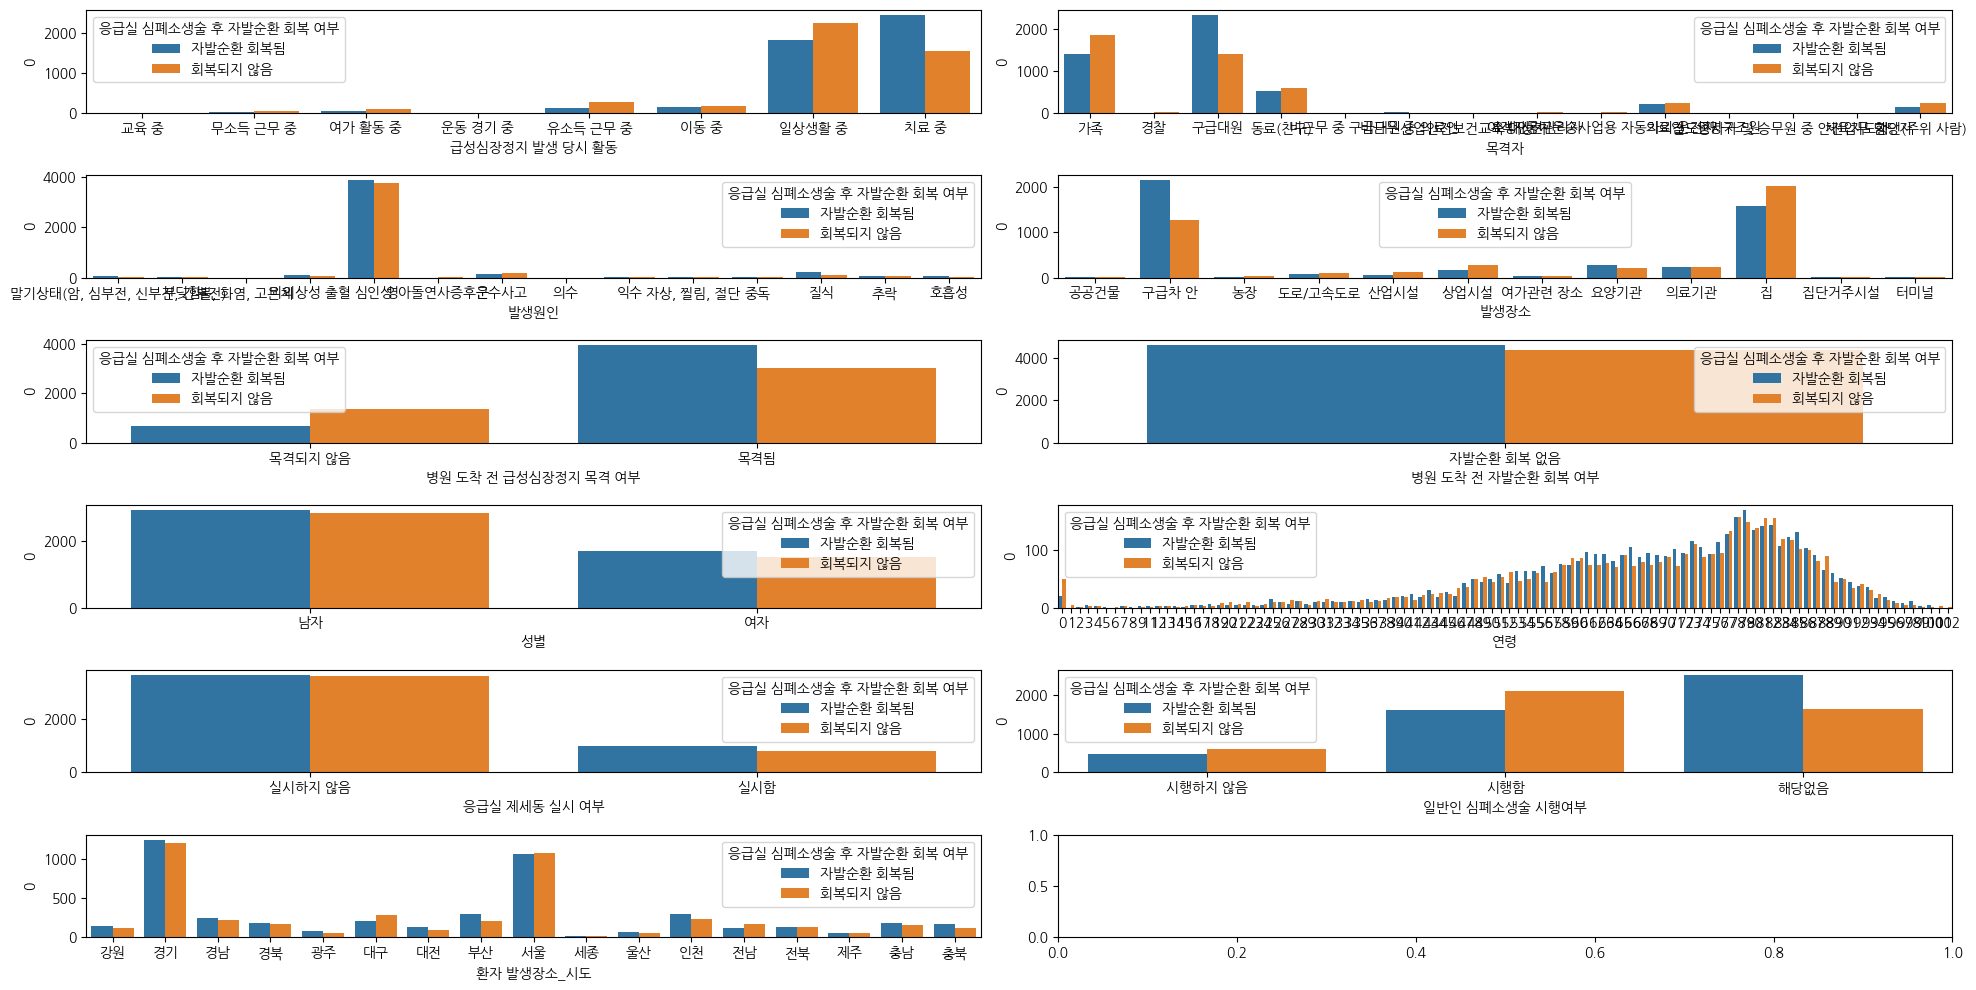

In [74]:
# ÏùºÎ∞òÏù∏ Ïã¨Ìèê ÏÜåÏÉùÏà† ÏãúÌñâ Ïó¨Î∂ÄÎ≥Ñ 
df2['ÏùºÎ∞òÏù∏ Ïã¨ÌèêÏÜåÏÉùÏà† ÏãúÌñâÏó¨Î∂Ä'] = df2['ÏùºÎ∞òÏù∏ Ïã¨ÌèêÏÜåÏÉùÏà† ÏãúÌñâÏó¨Î∂Ä'].apply(lambda x : 'Ìï¥ÎãπÏóÜÏùå' if x == 'Ìï¥ÎãπÏóÜÏùå(Í∑ºÎ¨¥ Ï§ëÏù∏ Íµ¨Í∏âÎåÄÏõê Î∞è ÏùòÎ£åÏù∏Ïù¥ Î™©Í≤©ÏûêÏù∏ Í≤ΩÏö∞)' else x) 

fig, axes = plt.subplots(6,2, figsize = (20, 10))

for i, axes in enumerate(axes.flat[:len(df2.columns.difference(['ÏùëÍ∏âÏã§ Ïã¨ÌèêÏÜåÏÉùÏà† ÌõÑ ÏûêÎ∞úÏàúÌôò ÌöåÎ≥µ Ïó¨Î∂Ä']))]) : 
    col_i = df2.columns.difference(['ÏùëÍ∏âÏã§ Ïã¨ÌèêÏÜåÏÉùÏà† ÌõÑ ÏûêÎ∞úÏàúÌôò ÌöåÎ≥µ Ïó¨Î∂Ä'])[i]
    target = df2.groupby([col_i,'ÏùëÍ∏âÏã§ Ïã¨ÌèêÏÜåÏÉùÏà† ÌõÑ ÏûêÎ∞úÏàúÌôò ÌöåÎ≥µ Ïó¨Î∂Ä']).size().reset_index()

    sns.barplot(x = col_i, y = 0 , hue = 'ÏùëÍ∏âÏã§ Ïã¨ÌèêÏÜåÏÉùÏà† ÌõÑ ÏûêÎ∞úÏàúÌôò ÌöåÎ≥µ Ïó¨Î∂Ä', data = target, ax = axes)

plt.tight_layout()
plt.show()

##### ‚úÖ 3. ÏùëÍ∏âÏã§ Ïã¨ÌèêÏÜåÏÉù ÌõÑ ÏûêÎ∞ú ÏàúÌôò ÌöåÎ≥µ Ïó¨Î∂ÄÏôÄ Í∞Å ÎèÖÎ¶ΩÎ≥ÄÏàòÍ∞Ñ ÌÜµÍ≥ÑÏ†Å Ï∞®Ïù¥ ÏûàÎäîÏßÄ Í≤ÄÏ†ï

In [75]:
y = ['ÏùëÍ∏âÏã§ Ïã¨ÌèêÏÜåÏÉùÏà† ÌõÑ ÏûêÎ∞úÏàúÌôò ÌöåÎ≥µ Ïó¨Î∂Ä']
x_cols = df2.columns.difference(['ÏùëÍ∏âÏã§ Ïã¨ÌèêÏÜåÏÉùÏà† ÌõÑ ÏûêÎ∞úÏàúÌôò ÌöåÎ≥µ Ïó¨Î∂Ä'])

res = []
for col in df2.columns : 
    if col in x_cols : 
        target = pd.crosstab(df2[col], df2['ÏùëÍ∏âÏã§ Ïã¨ÌèêÏÜåÏÉùÏà† ÌõÑ ÏûêÎ∞úÏàúÌôò ÌöåÎ≥µ Ïó¨Î∂Ä'])
        stat, p_val , _, __ =  chi2_contingency(target)
        res.append([col, p_val])

res = pd.DataFrame(res, columns = ['Cols', 'P_value'])
res['check'] = res.apply(lambda x : 'Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å' if x['P_value'] < 0.05 else 'Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù', axis = 1)
display(res)
print('''
Í∑ÄÎ¨¥Í∞ÄÏÑ§ : ÏûêÎ∞ú ÏàúÌôò ÌöåÎ≥µÏó¨Î∂ÄÏôÄ Ìï¥Îãπ Ïª¨ÎüºÏùÄ ÎèÖÎ¶ΩÏù¥Îã§. (ÏÉÅÍ¥ÄÏù¥ÏóÜÎã§)
ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : ÏûêÎ∞ú ÏàúÌôò ÌöåÎ≥µÏó¨Î∂ÄÏôÄ Ìï¥Îãπ Ïª¨ÎüºÏùÄ ÎèÖÎ¶ΩÏù¥ ÏïÑÎãàÎã§. (ÏÉÅÍ¥ÄÏù¥ÏûàÎã§)

ÏÑ±Î≥Ñ, Ïó∞Î†π, Î≥ëÏõê ÎèÑÏ∞©Ï†Ñ ÏûêÎ∞ú ÏàúÌôò ÌöåÎ≥µ Ïó¨Î∂ÄÎäî ÏùëÍ∏âÏã§ Ïã¨Ìèê ÏÜåÏÉùÏà† ÌõÑ ÏûêÎ∞ú ÏàúÌôò ÌöåÎ≥µ Ïó¨Î∂ÄÏôÄ ÏÉÅÍ¥ÄÏù¥ ÏóÜÏúºÎÇò,
Í∑∏ Ïô∏ Ïª¨ÎüºÏùÄ Ïú†ÏùòÌïú ÏÉÅÍ¥ÄÏù¥ ÏûàÎã§Îäî Ï†êÏùÑ Ïïå Ïàò ÏûàÎã§. 
''')

Cols       P_value    check
0                     ÏÑ±Î≥Ñ  8.548896e-02  Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù
1                     Ïó∞Î†π  1.967385e-01  Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù
2     Î≥ëÏõê ÎèÑÏ∞© Ï†Ñ ÏûêÎ∞úÏàúÌôò ÌöåÎ≥µ Ïó¨Î∂Ä  1.000000e+00  Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù
3   Î≥ëÏõê ÎèÑÏ∞© Ï†Ñ Í∏âÏÑ±Ïã¨Ïû•Ï†ïÏßÄ Î™©Í≤© Ïó¨Î∂Ä  1.019208e-76  Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å
4         ÏùºÎ∞òÏù∏ Ïã¨ÌèêÏÜåÏÉùÏà† ÏãúÌñâÏó¨Î∂Ä  1.118404e-60  Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å
5        Í∏âÏÑ±Ïã¨Ïû•Ï†ïÏßÄ Î∞úÏÉù ÎãπÏãú ÌôúÎèô  3.399277e-63  Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å
6          ÏùëÍ∏âÏã§ Ï†úÏÑ∏Îèô Ïã§Ïãú Ïó¨Î∂Ä  2.264996e-05  Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å
7             ÌôòÏûê Î∞úÏÉùÏû•ÏÜå_ÏãúÎèÑ  3.618110e-08  Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å
8                    Î™©Í≤©Ïûê  3.846845e-63  Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å
9                   Î∞úÏÉùÏû•ÏÜå  8.382043e-69  Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å
10                  Î∞úÏÉùÏõêÏù∏  6.702746e-20  Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å


Í∑ÄÎ¨¥Í∞ÄÏÑ§ : ÏûêÎ∞ú ÏàúÌôò ÌöåÎ≥µÏó¨Î∂ÄÏôÄ Ìï¥Îãπ Ïª¨ÎüºÏùÄ ÎèÖÎ¶ΩÏù¥Îã§. (ÏÉÅÍ¥ÄÏù¥ÏóÜÎã§)
ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : ÏûêÎ∞ú ÏàúÌôò ÌöåÎ≥µÏó¨Î∂ÄÏôÄ Ìï¥Îãπ Ïª¨ÎüºÏùÄ ÎèÖÎ¶ΩÏù¥ ÏïÑÎãàÎã§. (ÏÉÅÍ¥ÄÏù¥ÏûàÎã§)

ÏÑ±Î≥Ñ, Ïó∞Î†π, Î≥ëÏõê ÎèÑÏ∞©Ï†Ñ ÏûêÎ∞ú ÏàúÌôò ÌöåÎ≥µ Ïó¨Î∂ÄÎäî ÏùëÍ∏âÏã§ Ïã¨Ìèê ÏÜåÏÉùÏà† ÌõÑ ÏûêÎ∞ú ÏàúÌôò ÌöåÎ≥µ Ïó¨Î∂ÄÏôÄ ÏÉÅÍ¥ÄÏù¥ ÏóÜÏúºÎÇò,
Í∑∏ Ïô∏ Ïª¨ÎüºÏùÄ Ïú†ÏùòÌïú ÏÉÅÍ¥ÄÏù¥ ÏûàÎã§Îäî Ï†êÏùÑ Ïïå Ïàò ÏûàÎã§. 



##### ‚úÖ 4. Modelling 
    1. Îç∞Ïù¥ÌÑ∞Ïùò ÌñâÏùò Ïù∏Îç±Ïä§(0Î∂ÄÌÑ∞ÏãúÏûë)ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú 7Î°ú ÎÇòÎàà ÎÇòÎ®∏ÏßÄÍ∞Ä 0 ÎòêÎäî 3Ïù¥Î©¥ test, Í∑∏Î†áÏßÄ ÏïäÏúºÎ©¥ train
    2. Ï†ÑÏ≤òÎ¶¨Îäî train dataÏóê Ïö∞ÏÑ† Ïã§ÏãúÌïòÍ≥† train dataÏóêÏÑú ÌñàÎçò Ï†ÑÏ≤òÎ¶¨ Í∏∞Ï§ÄÏúºÎ°ú test dataÏóêÎèÑ Ï†ÅÏö©
    3. f1-score, accuracy_score, AUC

In [83]:
train_set = df2[(df2.index % 7 != 0) | (df2.index & 7 != 3)]

# label Encoding Ïã§Ìñâ 
for col in train_set.columns : 
    if train_set[col].dtypes == 'object' : 
        la = LabelEncoder()
        train_set[col] = la.fit_transform(train_set[col])
    else : 
        train_set[col]


In [84]:
test_set = df2[(df2.index % 7 == 0) | (df2.index & 7 == 3)]
# label Encoding Ïã§Ìñâ 
for col in test_set.columns : 
    if test_set[col].dtypes == 'object' : 
        la = LabelEncoder()
        test_set[col] = la.fit_transform(test_set[col])
    else : 
        test_set[col]

In [86]:
x_train = train_set.drop(columns = ['ÏùëÍ∏âÏã§ Ïã¨ÌèêÏÜåÏÉùÏà† ÌõÑ ÏûêÎ∞úÏàúÌôò ÌöåÎ≥µ Ïó¨Î∂Ä'], axis = 1)
y_train = train_set['ÏùëÍ∏âÏã§ Ïã¨ÌèêÏÜåÏÉùÏà† ÌõÑ ÏûêÎ∞úÏàúÌôò ÌöåÎ≥µ Ïó¨Î∂Ä']

x_test = test_set.drop(columns = ['ÏùëÍ∏âÏã§ Ïã¨ÌèêÏÜåÏÉùÏà† ÌõÑ ÏûêÎ∞úÏàúÌôò ÌöåÎ≥µ Ïó¨Î∂Ä'], axis = 1)
y_test = test_set['ÏùëÍ∏âÏã§ Ïã¨ÌèêÏÜåÏÉùÏà† ÌõÑ ÏûêÎ∞úÏàúÌôò ÌöåÎ≥µ Ïó¨Î∂Ä']

#### üéØ Random Forest Classifier
Ïó¨Îü¨ Í∞úÏùò Í≤∞Ï†ïÌä∏Î¶¨Î•º Î∞∞ÍπÖ(bagging) Î∞©ÏãùÏúºÎ°ú Í≤∞Ìï©Ìïú ÏïôÏÉÅÎ∏î ÌïôÏäµ Î™®Îç∏
   1. Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Ïóê Í∞ïÌï®: ÎùºÎ≤® Ïù∏ÏΩîÎî©Îêú Í∞íÏùÑ Ïà´ÏûêÎ°ú Ìï¥ÏÑùÌïòÏßÄ ÏïäÍ≥†, Î∂ÑÌï† Í∏∞Ï§ÄÏúºÎ°úÎßå ÏÇ¨Ïö©
   2. ÎπÑÏÑ†Ìòï Í¥ÄÍ≥Ñ ÌÉêÏßÄ Í∞ÄÎä•: feature Í∞Ñ ÏÉÅÌò∏ÏûëÏö©Ïù¥ ÏûàÏùÑ Í≤ΩÏö∞ÎèÑ Ïûò Ïû°ÏïÑÎÉÑ
   3. Í≥ºÏ†ÅÌï© Î∞©ÏßÄ: Îã§ÏàòÏùò Ìä∏Î¶¨Î•º ÌèâÍ∑†ÎÇ¥ÎØÄÎ°ú Í≥ºÏ†ÅÌï© ÏúÑÌóòÏù¥ ÎÇÆÏùå
   4. Ï§ëÏöîÎèÑ Ï∂îÏ†ï Í∞ÄÎä•: Í∞Å featureÏùò Ï§ëÏöîÎèÑÎ•º Ï†úÍ≥µ ‚Üí Ìï¥ÏÑù Í∞ÄÎä•ÏÑ± Ï¶ùÍ∞Ä

#### üéØ  XGBoost Classifier
    1. Gradient Boosting Í∏∞Î∞òÏùò Í∞ïÎ†•Ìïú ÏïôÏÉÅÎ∏î Î™®Îç∏
    2. Î≥µÏû°Ìïú Ìå®ÌÑ¥ ÌïôÏäµÏóê Í∞ïÌï® (ÎπÑÏÑ†Ìòï + Î≥ÄÏàò Í∞Ñ ÏÉÅÌò∏ÏûëÏö© Ìè¨Ìï®)
    3. Í≤∞Ï∏°Í∞í ÏûêÎèô Ï≤òÎ¶¨, regularization(Í∑úÏ†ú), Ï°∞Í∏∞ Ï¢ÖÎ£å Îì± Í∏∞Îä• ÎÇ¥Ïû•
    4. ÎåÄÍ∑úÎ™® Îç∞Ïù¥ÌÑ∞ÏÖãÏóê Ìö®Ïú®Ï†ÅÏù¥Î©∞ ÏÑ±Îä• ÏµúÏ†ÅÌôîÏóê Ïú†Î¶¨
    5. Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞ÎèÑ ÎùºÎ≤® Ïù∏ÏΩîÎî©ÎßåÏúºÎ°ú Ï≤òÎ¶¨ Í∞ÄÎä•

#### üéØ Tree Î™®Îç∏ ÏÑ†Ï†ï Ïù¥Ïú†
    - Îã®Ïàú ÏÑ†Ìòï Î∂ÑÎ•ò Î™®Îç∏(Logistic Regression)ÏùÄ Î≥ÄÏàò Í∞Ñ ÏÉÅÌò∏ÏûëÏö©ÏùÑ ÎØ∏Î∞òÏòÅ
    - ÏÑ†Ìòï Î™®Îç∏ÏùÄ ÏÑ†ÌòïÏÑ±ÏùÑ Í∞ÄÏ†ï (ÎèÖÎ¶Ω Î≥ÄÏàòÏôÄ Ï¢ÖÏÜç Î≥ÄÏàò Í∞ÑÏùò ÏÑ†ÌòïÍ¥ÄÍ≥Ñ) ÌïòÏßÄÎßå, Îç∞Ïù¥ÌÑ∞Îäî Î≤îÏ£ºÌòï Îç∞Ïù¥ÌÑ∞Î°ú Íµ¨ÏÑ± 
    - Ïõê-Ìï´ Ïù∏ÏΩîÎî©Ïãú Ï∞®ÏõêÏù¥ Îß§Ïö∞ Ïª§ÏßêÏóê Îî∞Îùº Îã§Ï§ë Í≥µÏÑ†ÏÑ±Ïùò Î¨∏Ï†ú Î∞úÏÉù Í∞ÄÎä•

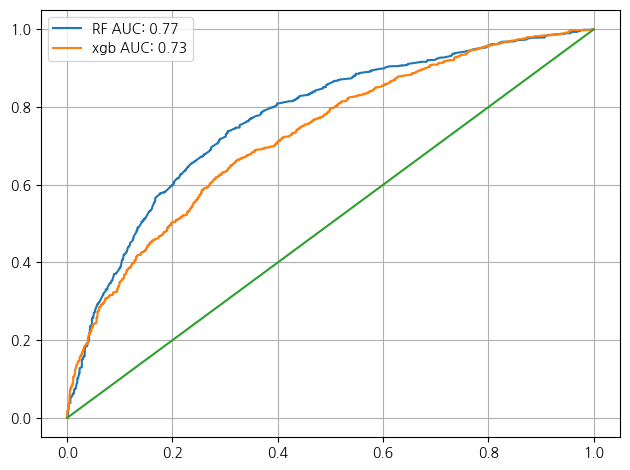

  Model  F1_score  Accuracy_score
0    RF  0.668327        0.704263
1   xgb  0.631063        0.665631


In [93]:

def eval_model(name, model, x_train, x_test, y_train, y_test) : 
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    f1 = f1_score(y_test, pred)
    accuracy = accuracy_score(y_test, pred)

    # ACU 
    pred_proba = model.predict_proba(x_test)[:,1]
    auc = roc_auc_score(y_test, pred_proba)

    fpr, tpr, _ = roc_curve(y_test, pred_proba)
    plt.plot(fpr, tpr, label = f'{name} AUC: {auc:.2f}')

    return f1, accuracy 

res = []
model_lst = []
for name, model in [['RF', RandomForestClassifier()] , ['xgb', xgb.XGBClassifier()]] : 
    f1, accuracy = eval_model(name, model, x_train, x_test, y_train, y_test)
    res.append([name, f1, accuracy])
    model_lst.append([name, model])

plt.plot([0,1],[0,1])
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(pd.DataFrame(res, columns = ['Model','F1_score', 'Accuracy_score']))

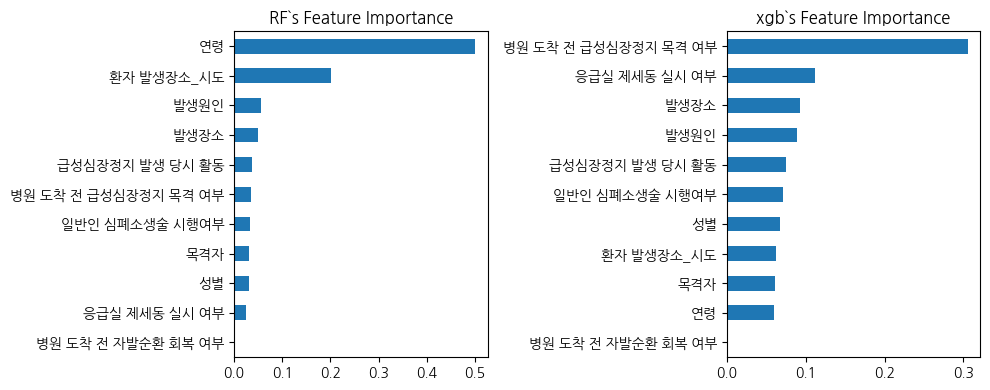

In [105]:
## Feature Importance 
fig, axes = plt.subplots(1,2, figsize = (10, 4))

for axes, (name, model) in zip(axes, model_lst) : 
    features = model.feature_importances_
    cols = model.feature_names_in_
    imp = pd.Series(features ,index = cols).sort_values()
    imp.plot.barh(ax = axes)
    axes.set_title(f'{name}`s Feature Importance')

plt.tight_layout()
plt.show()

#### üîç ÌÜµÍ≥Ñ
‚úÖ 1. ÏÑ∏ ÎßàÏºÄÌåÖ Ï†ÑÎûµ Í∞Ñ ÌåêÎß§ÎüâÏóê Ïú†ÏùòÎØ∏Ìïú Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ Î∂ÑÏÇ∞Î∂ÑÏÑùÏùÑ Ïã§Ïãú

In [109]:
df = pd.read_csv('C:/Users/82108/Notebook/EP_1_data/s1.csv')
df.head()

ÎßàÏºÄÌåÖÏ†ÑÎûµ     ÌåêÎß§Îüâ  ÎßåÏ°±ÎèÑ
0     A  524.84  8.8
1     A  493.09  8.2
2     A  532.38  8.0
3     A  576.15  9.0
4     A  488.29  9.3

In [112]:
from scipy.stats import shapiro, levene, kruskal

# 1) Ï†ïÍ∑úÏÑ± Í≤ÄÏ†ï 
shapi_res = []
for marketing in df['ÎßàÏºÄÌåÖÏ†ÑÎûµ'].unique() :
    target = df[df['ÎßàÏºÄÌåÖÏ†ÑÎûµ'] == marketing]['ÌåêÎß§Îüâ']
    stat, p_val = shapiro(target)
    shapi_res.append([marketing, p_val])

print(pd.DataFrame(shapi_res , columns = ['ÎßàÏºÄÌåÖ','P_value']) )

  ÎßàÏºÄÌåÖ   P_value
0   A  0.672051
1   B  0.453425
2   C  0.091206


In [121]:
# 2)Îì±Î∂ÑÏÇ∞ 
groups = [group['ÌåêÎß§Îüâ'].values for name, group in df.groupby('ÎßàÏºÄÌåÖÏ†ÑÎûµ')]

stat, p_val = levene(*groups)
print(p_val)

5.452407609077732e-10


In [126]:
# 3) ÎπÑÎ™®Ïàò Í≤ÄÏ†ï : AnovaÏùò ÎπÑÎ™®Ïàò - Kruskal-Wallis 
stat, p_val = kruskal(* [ group['ÌåêÎß§Îüâ'].values for name, group in df.groupby(['ÎßàÏºÄÌåÖÏ†ÑÎûµ'])])
print(p_val)

3.0448226717402373e-27


              A             B             C
A  1.000000e+00  6.793820e-07  1.318722e-09
B  6.793820e-07  1.000000e+00  2.670505e-28
C  1.318722e-09  2.670505e-28  1.000000e+00


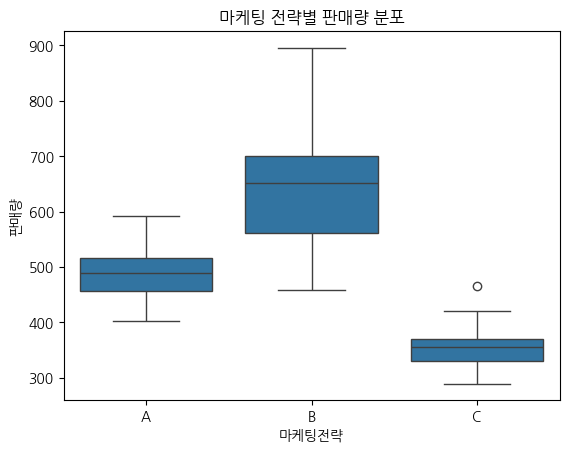


dunn ÏúºÎ°ú Í≤ÄÏ†ïÌïú Í≤∞Í≥º, A,B,CÏóê Îî∞Îùº ÌåêÎß§Îüâ Ï∞®Ïù¥Í∞Ä Ïú†ÏùòÌïòÎã§Í≥† ÎÇòÌÉÄÎÇòÎ©∞, Ïù¥Î•º Î∞ïÏä§ ÌîåÎ°ØÏùò ÌòïÌÉúÎ°ú 
Î≥¥Ïó¨Ï§ÄÎã§. Ïù¥Îäî Í∞Å ÎßàÏºÄÌåÖÏóê Îî∞Îùº ÌåêÎß§ÎüâÏù¥ Îã§Î•¥Í∏∞ ÎïåÎ¨∏Ïóê, ÎßàÏºÄÌåÖ Î≥Ñ Ï†ÑÎûµÎ≥Ñ Ìö®Í≥º Î∂ÑÏÑùÏù¥ ÌïÑÏöîÌï¥Î≥¥Ïù∏Îã§. 



In [133]:
# ÏïÑÎÖ∏Î∞î -> ÌÑ∞ÌÇ§
# Ïõ∞Ïπò -> Í≤åÏûÑÏä§ ÌïòÏõî
# ÌÅ¨Î£®Ïä§ÏπºÏúåÎ¶¨Ïä§ Dunn's testÎ•º ÏÇ¨Ïö©

from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(df['ÌåêÎß§Îüâ'] , df['ÎßàÏºÄÌåÖÏ†ÑÎûµ'], alpha = 0.05)
#tukey.plot_simultaneous()
#plt.show()

import scikit_posthocs as sp
print(sp.posthoc_dunn(df, val_col='ÌåêÎß§Îüâ', group_col='ÎßàÏºÄÌåÖÏ†ÑÎûµ'))

sns.boxplot(data=df, x='ÎßàÏºÄÌåÖÏ†ÑÎûµ', y='ÌåêÎß§Îüâ')
plt.title("ÎßàÏºÄÌåÖ Ï†ÑÎûµÎ≥Ñ ÌåêÎß§Îüâ Î∂ÑÌè¨")
plt.show()

print('''
dunn ÏúºÎ°ú Í≤ÄÏ†ïÌïú Í≤∞Í≥º, A,B,CÏóê Îî∞Îùº ÌåêÎß§Îüâ Ï∞®Ïù¥Í∞Ä Ïú†ÏùòÌïòÎã§Í≥† ÎÇòÌÉÄÎÇòÎ©∞, Ïù¥Î•º Î∞ïÏä§ ÌîåÎ°ØÏùò ÌòïÌÉúÎ°ú 
Î≥¥Ïó¨Ï§ÄÎã§. Ïù¥Îäî Í∞Å ÎßàÏºÄÌåÖÏóê Îî∞Îùº ÌåêÎß§ÎüâÏù¥ Îã§Î•¥Í∏∞ ÎïåÎ¨∏Ïóê, ÎßàÏºÄÌåÖ Î≥Ñ Ï†ÑÎûµÎ≥Ñ Ìö®Í≥º Î∂ÑÏÑùÏù¥ ÌïÑÏöîÌï¥Î≥¥Ïù∏Îã§. 
''')